<a href="https://colab.research.google.com/github/dlguswn3659/2020_Image_Lab/blob/master/davich_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [633]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
import keras
import datetime
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10
                                 ) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

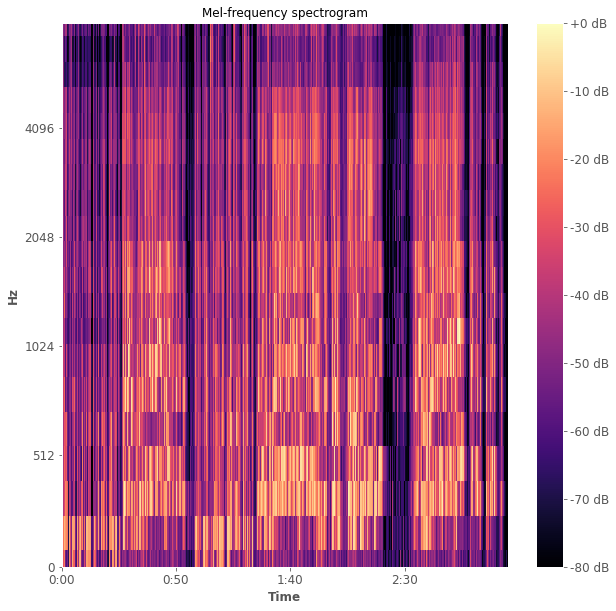

In [634]:
y,sr = librosa.load('this_love.mp3')
dur_time = librosa.get_duration(y,sr=sr)
time_sec = round(dur_time)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=20, fmax=8000)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
#plt.xlim(60,120)

In [635]:
start = 0 
end = time_sec 
time_series_sec = np.linspace(start,end,len(S_dB[0]))

In [636]:
print(end)

195


In [637]:
data = pd.read_csv('thislove.CSV')

In [638]:
print(data)

  speaker minute                                               text  Unnamed: 3
0       K  00:26  f I turn back time, will my memory be erased?\...         NaN
1       L  01:24  But I can't live outside of you\nFor me, only ...         NaN
2       K  01:51  I guess love is like that no matter what I say...         NaN
3       L  02:04  You know, I can't live outside of you\nFor me,...         NaN
4       K  02:32  You know, I can't live outside of you\nFor me,...         NaN
5       L  03:15  You know, I can't live outside of you\nFor me,...         NaN


In [639]:
def convert_to_sec(time_string):
    time_s_list = time_string.split(':')
    if len(time_s_list)>2:
        date_time = datetime.datetime.strptime(time_string, "%H:%M:%S")
        a_timedelta = date_time - datetime.datetime(1900, 1, 1)
        seconds = a_timedelta.total_seconds()
    else:
        date_time = datetime.datetime.strptime(time_string, "%M:%S")
        a_timedelta = date_time - datetime.datetime(1900, 1, 1)
        seconds = a_timedelta.total_seconds()
    return seconds

In [640]:
minute_list = data.minute.tolist()

In [641]:
SEC_LIST = []
for t in minute_list:
    try:
        SEC_LIST.append(convert_to_sec(t))
    except:
        SEC_LIST.append(0)
for k in range(2):
    for i in range(len(SEC_LIST)-1):
        if SEC_LIST[i]==SEC_LIST[i+1]:
            SEC_LIST[i+1]=SEC_LIST[i]+1
# turn_index = SEC_LIST.index(0)
# print(turn_index)
# to_add = SEC_LIST[turn_index-1]
# for j in range(turn_index,len(SEC_LIST)):
#     SEC_LIST[j]=SEC_LIST[j]+to_add
data['Seconds']=SEC_LIST

In [642]:
data.head()

speaker minute  ... Unnamed: 3  Seconds
0       K  00:26  ...        NaN     26.0
1       L  01:24  ...        NaN     84.0
2       K  01:51  ...        NaN    111.0
3       L  02:04  ...        NaN    124.0
4       K  02:32  ...        NaN    152.0

[5 rows x 5 columns]

In [643]:
new_data = data[data.Seconds<=time_series_sec.max()]
new_data.speaker = new_data.speaker.replace({'K:':'K'})

In [644]:
max_sec = new_data.Seconds.max()

In [645]:
print(max_sec)

195.0


In [646]:
new_data.drop_duplicates(subset='speaker')

speaker minute  ... Unnamed: 3  Seconds
0       K  00:26  ...        NaN     26.0
1       L  01:24  ...        NaN     84.0

[2 rows x 5 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


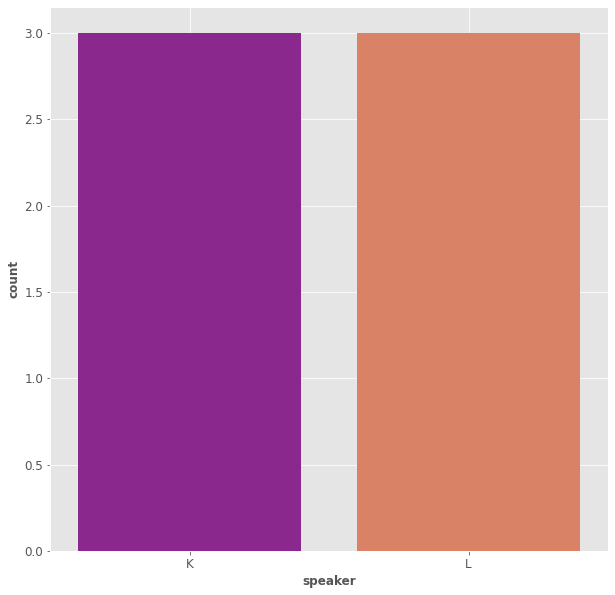

In [647]:
sns.countplot(new_data.speaker,palette='plasma')
plt.grid(True)

In [648]:
audio_data = pd.DataFrame(S_dB)

In [649]:
audio_data = audio_data.T

In [650]:
audio_data.tail()

0     1     2     3     4   ...    15    16    17    18    19
8397 -69.597374 -80.0 -80.0 -80.0 -80.0  ... -80.0 -80.0 -80.0 -80.0 -80.0
8398 -71.440811 -80.0 -80.0 -80.0 -80.0  ... -80.0 -80.0 -80.0 -80.0 -80.0
8399 -74.100502 -80.0 -80.0 -80.0 -80.0  ... -80.0 -80.0 -80.0 -80.0 -80.0
8400 -78.323730 -80.0 -80.0 -80.0 -80.0  ... -80.0 -80.0 -80.0 -80.0 -80.0
8401 -80.000000 -80.0 -80.0 -80.0 -80.0  ... -80.0 -80.0 -80.0 -80.0 -80.0

[5 rows x 20 columns]

In [651]:
import numpy as np
from sklearn.decomposition import PCA

In [652]:
pca = PCA(n_components=4)
pca.fit(audio_data)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [653]:
pca_data = pd.DataFrame(pca.transform(audio_data))

Text(0, 0.5, 'Second component')

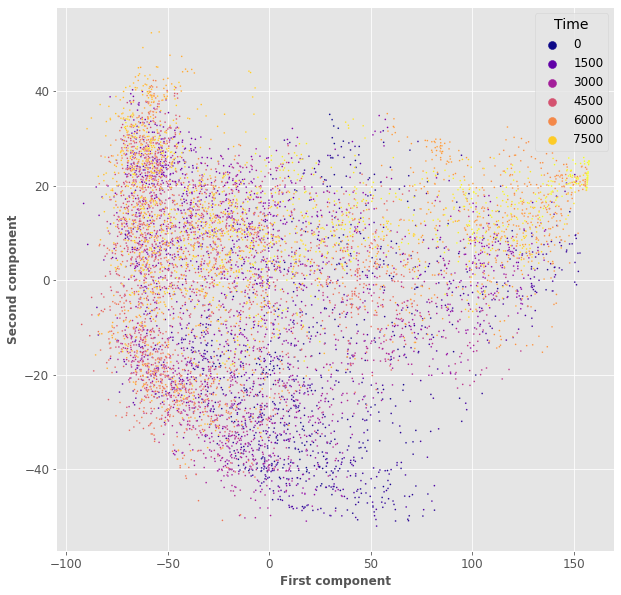

In [654]:
plt.grid(True)
sns.scatterplot(x=pca_data[0],y=pca_data[1],hue=pca_data.index,s=3,palette='plasma')
plt.legend(title='Time')
plt.xlabel('First component')
plt.ylabel('Second component')

In [655]:
audio_time = np.array(pca_data.index.tolist())*max_sec/np.array(pca_data.index.tolist()).max()
pca_data['Time']=audio_time
pca_data.head()

0          1         2         3      Time
0  157.496613  25.152679  5.848299  2.189174  0.000000
1  157.496613  25.152679  5.848299  2.189174  0.023212
2  157.496613  25.152679  5.848299  2.189174  0.046423
3  148.059448  14.469316  0.719858  1.723969  0.069635
4  111.575562   8.742360  8.499623  1.803049  0.092846

In [656]:
nd_time_list = [0]+new_data.Seconds.tolist()
CLASS = []
for j in range(len(audio_time)):
    time_j = audio_time[j]
    for i in range(1,len(nd_time_list)):
        start_i = nd_time_list[i-1]
        end_i = nd_time_list[i]
        if time_j>=start_i and time_j<=end_i:
            CLASS.append(new_data.loc[i-1].speaker)

In [657]:
print(pca_data)
print(len(pca_data)-2)
print(len(CLASS))
pca_data['speaker']=CLASS[0:len(pca_data)]

               0          1         2         3        Time
0     157.496613  25.152679  5.848299  2.189174    0.000000
1     157.496613  25.152679  5.848299  2.189174    0.023212
2     157.496613  25.152679  5.848299  2.189174    0.046423
3     148.059448  14.469316  0.719858  1.723969    0.069635
4     111.575562   8.742360  8.499623  1.803049    0.092846
...          ...        ...       ...       ...         ...
8397  156.613159  20.598270  7.816919  3.615096  194.907154
8398  156.769714  21.405350  7.468057  3.362410  194.930365
8399  156.995590  22.569799  6.964738  2.997836  194.953577
8400  157.354263  24.418783  6.165521  2.418944  194.976788
8401  157.496613  25.152679  5.848299  2.189174  195.000000

[8402 rows x 5 columns]
8400
8402


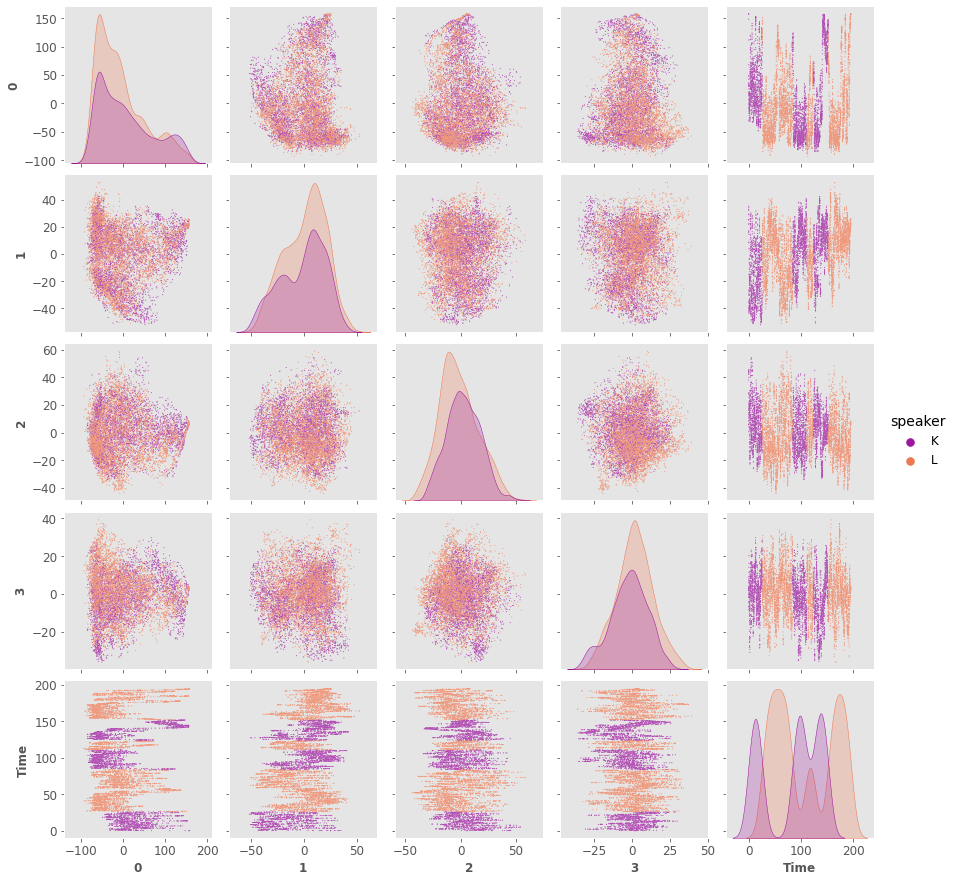

In [658]:
#plt.grid(True)
sns.pairplot(pca_data,hue='speaker',plot_kws={'s':1},palette='plasma')

In [659]:
from sklearn.feature_selection import mutual_info_classif as mi

In [660]:
mi(X=pca_data[['Time',0,1,2,3]],y=pca_data['speaker'])

array([0.67786037, 0.00484285, 0.00994865, 0.02199662, 0.01574598])

In [661]:
time_series_data = pca_data[['Time',2,'speaker']]

In [662]:
time_series_data = time_series_data.rename(columns={2:'X'})

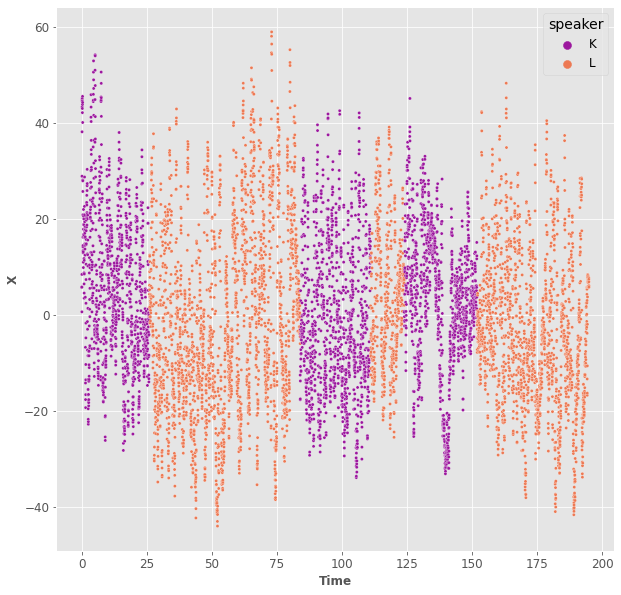

In [663]:
sns.scatterplot(x='Time',y='X',hue='speaker',data=time_series_data,s=10,palette='plasma')
plt.grid(True)

In [664]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [665]:
time_series_data['speaker']=le.fit_transform(time_series_data.speaker)

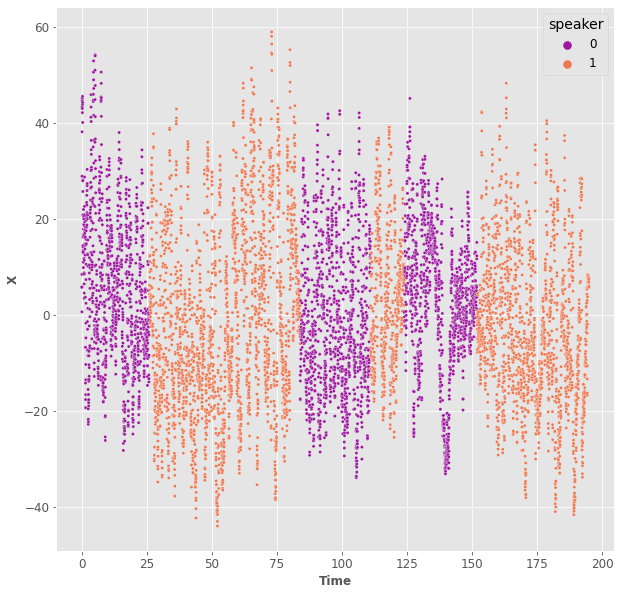

In [666]:
sns.scatterplot(x='Time',y='X',hue='speaker',data=time_series_data,s=10,palette='plasma')
plt.grid(True)

In [667]:
encod_dic = {0:'K',2:'D',1:'L'}

In [668]:
X=time_series_data[['Time','X']]
y=time_series_data.speaker

In [669]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [670]:
x_train = np.array(X_train)
x_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [671]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [672]:
num_classes = len(np.unique(y_train))


In [673]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [674]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [675]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
#keras.utils.plot_model(model, show_shapes=True)


In [676]:
epochs = 1000
batch_size = 50

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model_davichi.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    # keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/1000
108/108 [==============================] - 2s 6ms/step - loss: 0.3724 - sparse_categorical_accuracy: 0.8238 - val_loss: 1.0692 - val_sparse_categorical_accuracy: 0.5695
Epoch 2/1000
108/108 [==============================] - 0s 4ms/step - loss: 0.3039 - sparse_categorical_accuracy: 0.8547 - val_loss: 0.6338 - val_sparse_categorical_accuracy: 0.6989
Epoch 3/1000
108/108 [==============================] - 0s 4ms/step - loss: 0.3037 - sparse_categorical_accuracy: 0.8488 - val_loss: 0.3491 - val_sparse_categorical_accuracy: 0.8171
Epoch 4/1000
108/108 [==============================] - 1s 5ms/step - loss: 0.3047 - sparse_categorical_accuracy: 0.8501 - val_loss: 0.2649 - val_sparse_categorical_accuracy: 0.8625
Epoch 5/1000
108/108 [==============================] - 0s 5ms/step - loss: 0.2899 - sparse_categorical_accuracy: 0.8596 - val_loss: 0.2766 - val_sparse_categorical_accuracy: 0.8610
Epoch 6/1000
108/108 [==============================] - 0s 4ms/step - loss: 0.3006 - spars

In [677]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

53/53 [==============================] - 0s 1ms/step - loss: 0.1294 - sparse_categorical_accuracy: 0.9340
Test accuracy 0.9339678883552551
Test loss 0.12939567863941193


In [678]:
print(x_test)
print(len(x_test))
print(y_test)
print(len(y_test))

[[[ 12.02356862]
  [  5.77120543]]

 [[155.02975836]
  [ -8.80879593]]

 [[  5.40828473]
  [ 17.78560257]]

 ...

 [[  5.01368885]
  [ -4.11841583]]

 [[ 24.09356029]
  [ -9.03381252]]

 [[  7.49732175]
  [ 50.61898804]]]
1681
[0 1 0 ... 0 0 0]
1681


In [679]:
encod_dic[0]

'K'

In [680]:
pred_test = pd.DataFrame(model.predict(x_test))

In [681]:
pred_test = pred_test.rename(columns={0:encod_dic[0]})

In [682]:
pred_test = pred_test.rename(columns={1:encod_dic[1]})

In [683]:
pred_test = pred_test.rename(columns={2:encod_dic[2]})

In [684]:
pred_test.head()

K         L
0  9.999918e-01  0.000008
1  3.287418e-01  0.671258
2  9.999950e-01  0.000005
3  9.958760e-01  0.004124
4  8.183954e-10  1.000000

In [685]:
test_data = X_test.reset_index().drop('index',axis=1)
test_data['target']=y_test
test_data['K']=pred_test['K']
test_data['L']=pred_test['L']
# test_data['D']=pred_test['D']

In [686]:
target_list = test_data.target.tolist()
for t in range(len(target_list)):
    target_list[t]=encod_dic[target_list[t]]

In [687]:
test_data['target']=target_list

In [688]:
test_data = test_data.sort_values(by='Time')

In [689]:
test_data

Time          X target             K             L
212     0.185692  44.828533      K  9.999999e-01  6.686298e-08
62      0.394596  28.149620      K  9.999977e-01  2.256396e-06
380     0.441019  25.769159      K  9.999967e-01  3.294293e-06
461     0.533865  14.523077      K  9.999963e-01  3.703236e-06
1323    0.603500  13.220221      K  9.999961e-01  3.952870e-06
...          ...        ...    ...           ...           ...
1282  194.466135   7.153177      L  7.077330e-17  1.000000e+00
263   194.767885   7.302797      L  3.494723e-17  1.000000e+00
1329  194.814308   7.367784      L  3.086907e-17  1.000000e+00
1666  194.860731   7.196321      L  2.902304e-17  1.000000e+00
111   194.976788   6.165521      L  2.886394e-17  1.000000e+00

[1681 rows x 5 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


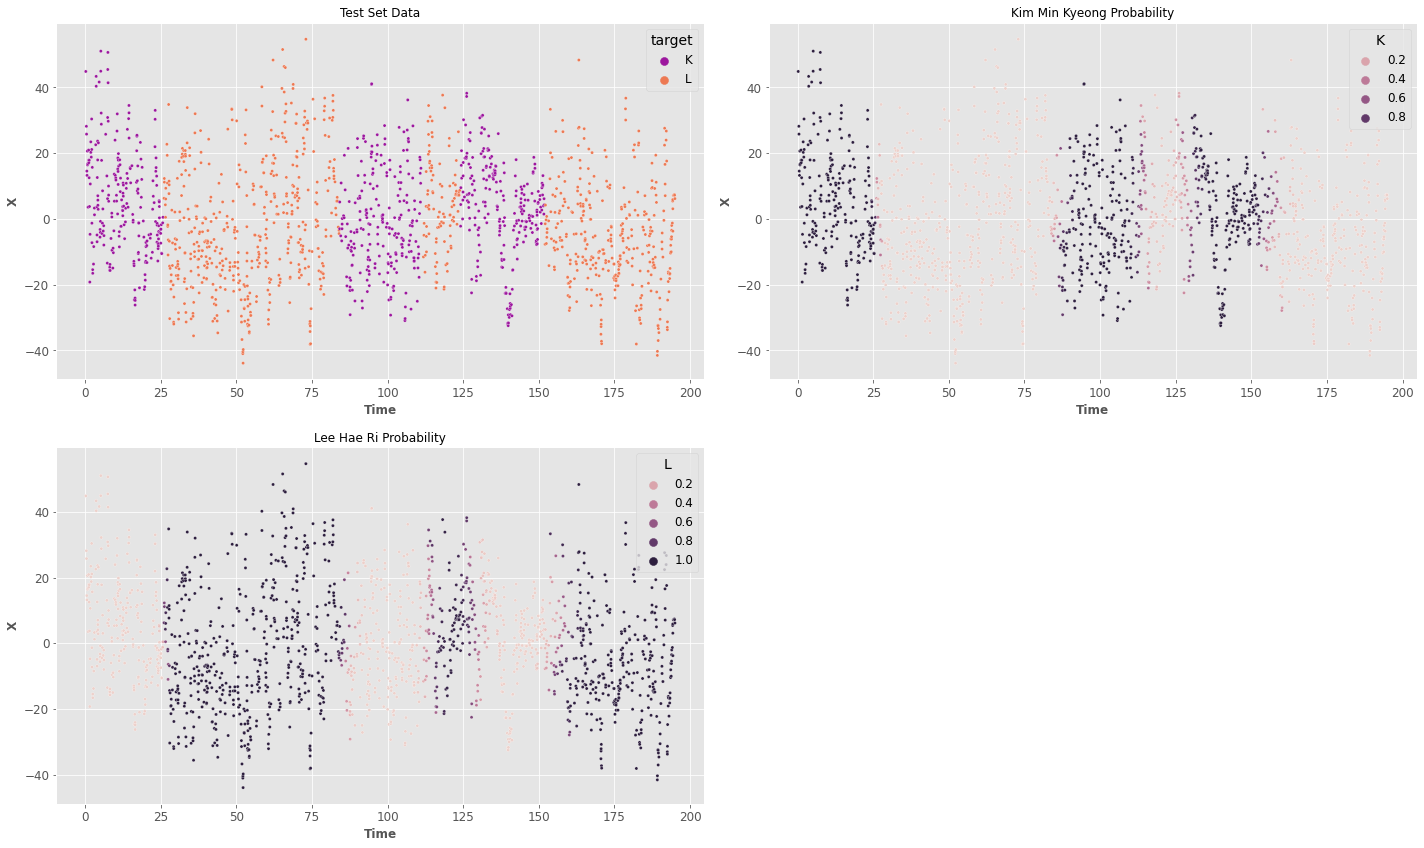

In [690]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.title('Test Set Data')
sns.scatterplot(test_data.Time,test_data.X,s=10,hue=test_data.target,palette='plasma')
plt.grid(True)
plt.subplot(2,2,2)
plt.title('Kim Min Kyeong Probability')
sns.scatterplot(test_data.Time,test_data.X,s=10,hue=test_data['K'])
plt.grid(True)
plt.subplot(2,2,3)
plt.title('Lee Hae Ri Probability')
sns.scatterplot(test_data.Time,test_data.X,s=10,hue=test_data['L'])
plt.grid(True)
# plt.subplot(2,2,4)
# plt.title('Duet Probability')
# sns.scatterplot(test_data.Time,test_data.X,s=10,hue=test_data['D'])
# plt.grid(True)
plt.tight_layout()

In [691]:
def model_to_clf(input_data):
    pred_list = model.predict(input_data)
    LIST_PRED = []
    for p in pred_list:
        LIST_PRED.append(np.argmax(p))
    return LIST_PRED

In [692]:
cm=confusion_matrix(model_to_clf(x_test),y_test)

In [693]:
# cm_data = pd.DataFrame(cm,columns=[encod_dic[0],encod_dic[1],encod_dic[2]])
cm_data = pd.DataFrame(cm,columns=[encod_dic[0], encod_dic[2]])

In [694]:
# cm_data.index = [encod_dic[0],encod_dic[1],encod_dic[2]]
cm_data.index = [encod_dic[0],encod_dic[2]]

In [695]:
cm_data

K    D
K  659   54
D   57  911

(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

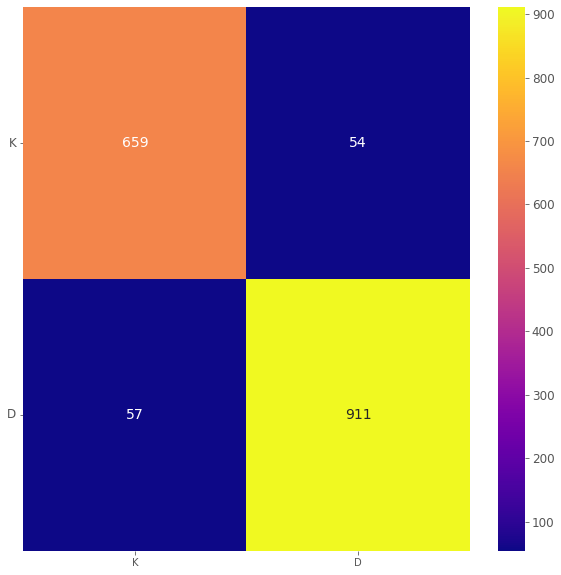

In [696]:
sns.heatmap(cm_data.astype(int), fmt='d', annot=True,cmap='plasma')
plt.yticks(rotation=0)
plt.xticks(rotation=0,fontsize=10)

In [697]:
clf_report = classification_report(y_test,
                                   model_to_clf(x_test),
                                  #  labels= [0,1,2],
                                   labels= [0,1],
                                   target_names= [encod_dic[0],encod_dic[1],encod_dic[2]],
                                   output_dict=True)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1989: UserWarning: labels size, 2, does not match size of target_names, 3
  .format(len(labels), len(target_names))


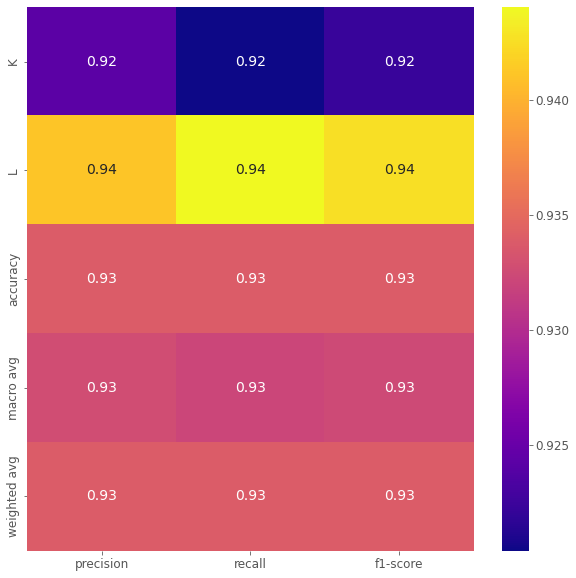

In [698]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,cmap='plasma')


In [699]:
!pip install jovian

In [700]:
import jovian
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


# **Test 음원 돌려보기**

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

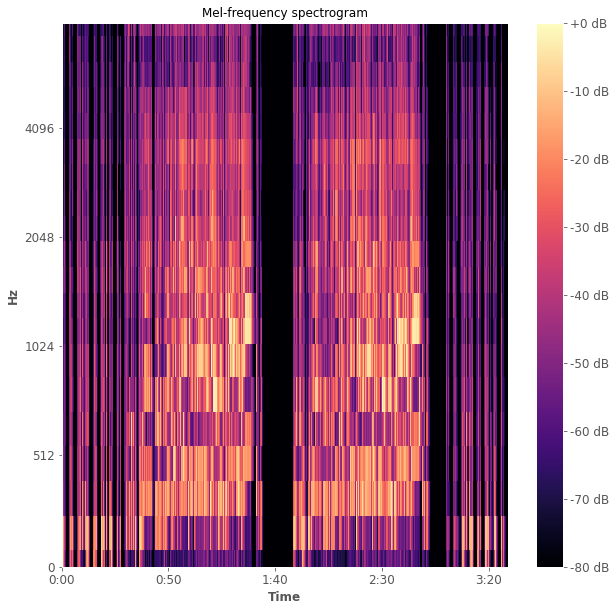

In [701]:
y,sr = librosa.load('davich2.mp3')
dur_time = librosa.get_duration(y,sr=sr)
time_sec = round(dur_time)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=20, fmax=8000)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
#plt.xlim(60,120)

In [702]:
start = 0 
end = time_sec 
time_series_sec = np.linspace(start,end,len(S_dB[0]))
print(end)

209


In [703]:
data = pd.read_csv('davich2.CSV')
print(data)

  speaker minute          text
0       L  00:28       abcdefg
1       K  00:58       efghizk
2       L  01:34  asdfasdfsadf
3       K  02:18    dfasdfasdf
4       L  02:53   safdafdasdf
5       K  03:29   asdfasdfasf


In [704]:
def convert_to_sec(time_string):
    time_s_list = time_string.split(':')
    if len(time_s_list)>2:
        date_time = datetime.datetime.strptime(time_string, "%H:%M:%S")
        a_timedelta = date_time - datetime.datetime(1900, 1, 1)
        seconds = a_timedelta.total_seconds()
    else:
        date_time = datetime.datetime.strptime(time_string, "%M:%S")
        a_timedelta = date_time - datetime.datetime(1900, 1, 1)
        seconds = a_timedelta.total_seconds()
    return seconds

In [705]:
minute_list = data.minute.tolist()

In [706]:
SEC_LIST = []
for t in minute_list:
    try:
        SEC_LIST.append(convert_to_sec(t))
    except:
        SEC_LIST.append(0)
for k in range(2):
    for i in range(len(SEC_LIST)-1):
        if SEC_LIST[i]==SEC_LIST[i+1]:
            SEC_LIST[i+1]=SEC_LIST[i]+1
# turn_index = SEC_LIST.index(0)
# print(turn_index)
# to_add = SEC_LIST[turn_index-1]
# for j in range(turn_index,len(SEC_LIST)):
#     SEC_LIST[j]=SEC_LIST[j]+to_add
data['Seconds']=SEC_LIST

In [707]:
new_data = data[data.Seconds<=time_series_sec.max()]
new_data.speaker = new_data.speaker.replace({'K:':'K'})

max_sec = new_data.Seconds.max()
print(max_sec)

209.0


In [708]:
new_data.drop_duplicates(subset='speaker')

speaker minute     text  Seconds
0       L  00:28  abcdefg     28.0
1       K  00:58  efghizk     58.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


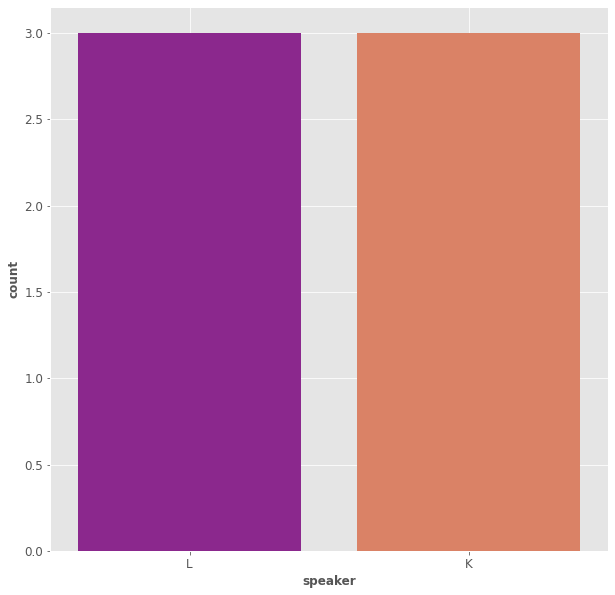

In [709]:
sns.countplot(new_data.speaker,palette='plasma')
plt.grid(True)

In [710]:
audio_data = pd.DataFrame(S_dB)

In [711]:
audio_data = audio_data.T

In [712]:
audio_data.tail()

0     1     2     3     4     5   ...    14    15    16    17    18    19
9001 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  ... -80.0 -80.0 -80.0 -80.0 -80.0 -80.0
9002 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  ... -80.0 -80.0 -80.0 -80.0 -80.0 -80.0
9003 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  ... -80.0 -80.0 -80.0 -80.0 -80.0 -80.0
9004 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  ... -80.0 -80.0 -80.0 -80.0 -80.0 -80.0
9005 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  ... -80.0 -80.0 -80.0 -80.0 -80.0 -80.0

[5 rows x 20 columns]

In [713]:
import numpy as np
from sklearn.decomposition import PCA

In [714]:
pca = PCA(n_components=4)
pca.fit(audio_data)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [715]:
pca_data = pd.DataFrame(pca.transform(audio_data))

Text(0, 0.5, 'Second component')

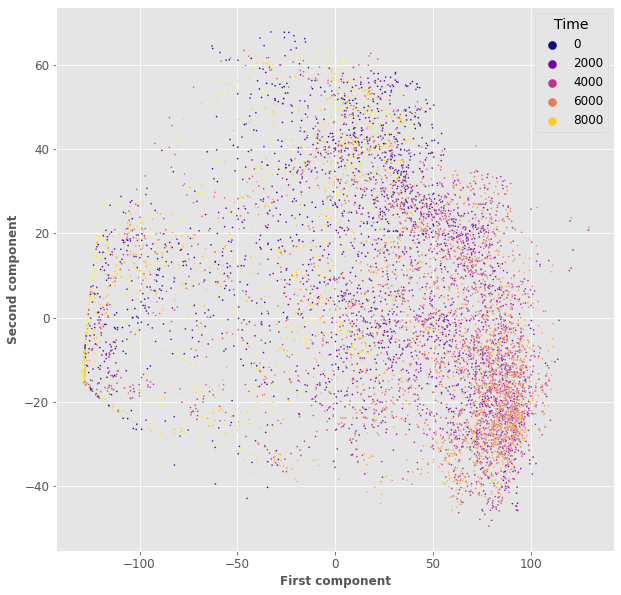

In [716]:
plt.grid(True)
sns.scatterplot(x=pca_data[0],y=pca_data[1],hue=pca_data.index,s=3,palette='plasma')
plt.legend(title='Time')
plt.xlabel('First component')
plt.ylabel('Second component')

In [717]:
audio_time = np.array(pca_data.index.tolist())*max_sec/np.array(pca_data.index.tolist()).max()
pca_data['Time']=audio_time
pca_data.head()

0          1         2         3      Time
0 -129.56778 -14.897431  1.633861 -0.523835  0.000000
1 -129.56778 -14.897431  1.633861 -0.523835  0.023209
2 -129.56778 -14.897431  1.633861 -0.523835  0.046419
3 -129.56778 -14.897431  1.633861 -0.523835  0.069628
4 -129.56778 -14.897431  1.633861 -0.523835  0.092837

In [718]:
nd_time_list = [0]+new_data.Seconds.tolist()
CLASS = []
for j in range(len(audio_time)):
    time_j = audio_time[j]
    for i in range(1,len(nd_time_list)):
        start_i = nd_time_list[i-1]
        end_i = nd_time_list[i]
        if time_j>=start_i and time_j<=end_i:
            CLASS.append(new_data.loc[i-1].speaker)

In [719]:
print(pca_data)
print(len(pca_data)-2)
print(len(CLASS))
pca_data['speaker']=CLASS[0:len(pca_data)]

              0          1         2         3        Time
0    -129.56778 -14.897431  1.633861 -0.523835    0.000000
1    -129.56778 -14.897431  1.633861 -0.523835    0.023209
2    -129.56778 -14.897431  1.633861 -0.523835    0.046419
3    -129.56778 -14.897431  1.633861 -0.523835    0.069628
4    -129.56778 -14.897431  1.633861 -0.523835    0.092837
...         ...        ...       ...       ...         ...
9001 -129.56778 -14.897431  1.633861 -0.523835  208.907163
9002 -129.56778 -14.897431  1.633861 -0.523835  208.930372
9003 -129.56778 -14.897431  1.633861 -0.523835  208.953581
9004 -129.56778 -14.897431  1.633861 -0.523835  208.976791
9005 -129.56778 -14.897431  1.633861 -0.523835  209.000000

[9006 rows x 5 columns]
9004
9006


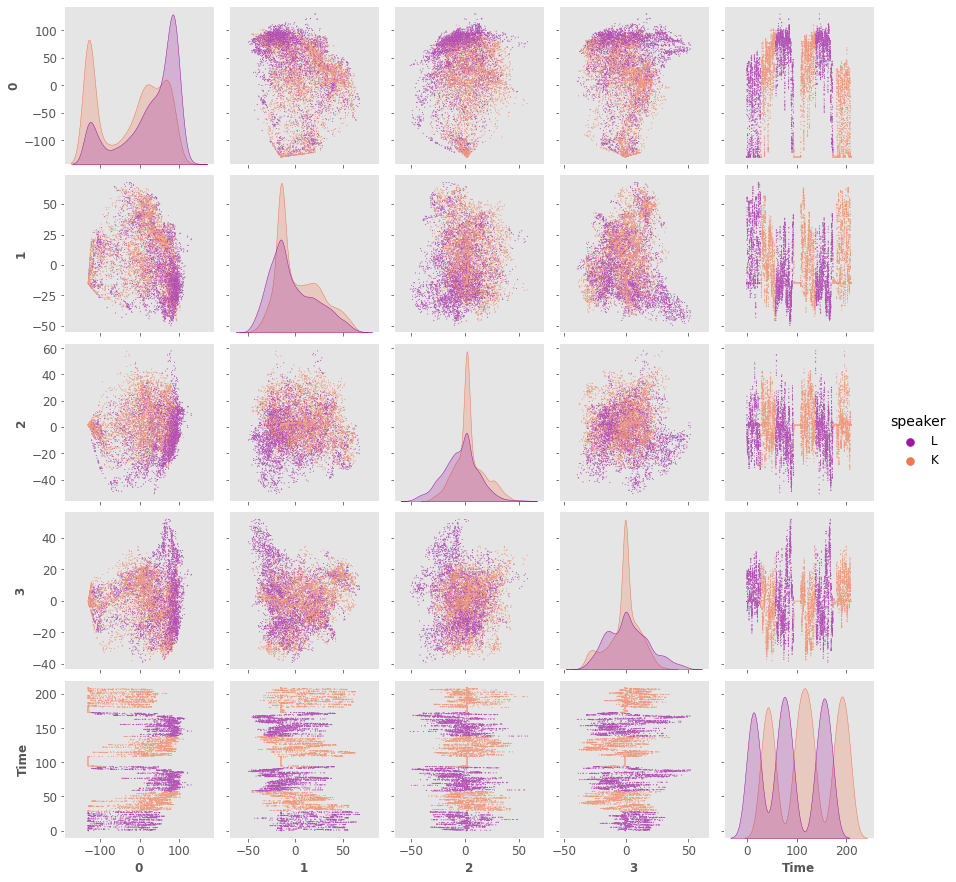

In [720]:
#plt.grid(True)
sns.pairplot(pca_data,hue='speaker',plot_kws={'s':1},palette='plasma')

In [721]:
from sklearn.feature_selection import mutual_info_classif as mi

mi(X=pca_data[['Time',0,1,2,3]],y=pca_data['speaker'])

time_series_data = pca_data[['Time',2,'speaker']]

time_series_data = time_series_data.rename(columns={2:'X'})

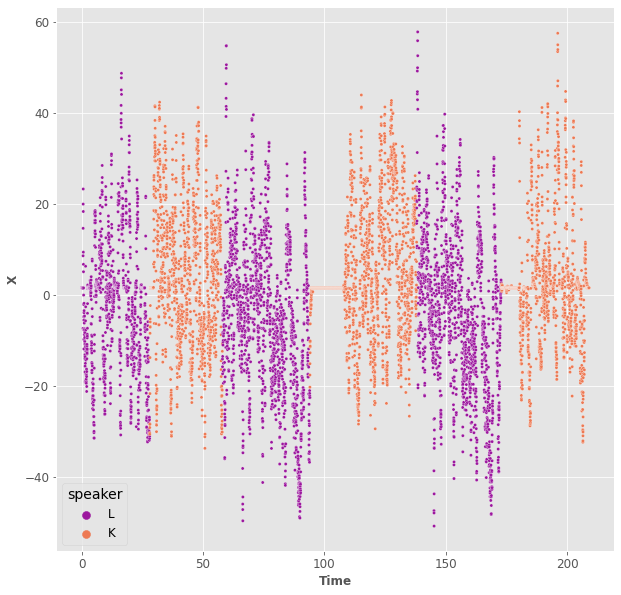

In [722]:
sns.scatterplot(x='Time',y='X',hue='speaker',data=time_series_data,s=10,palette='plasma')
plt.grid(True)

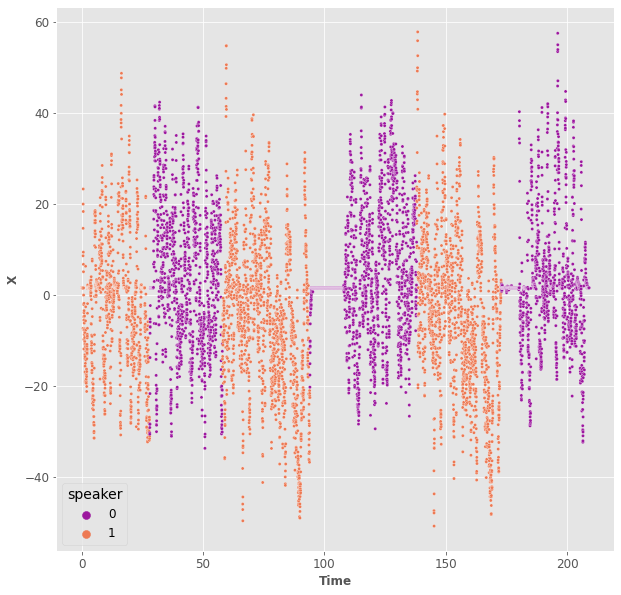

In [723]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

time_series_data['speaker']=le.fit_transform(time_series_data.speaker)

sns.scatterplot(x='Time',y='X',hue='speaker',data=time_series_data,s=10,palette='plasma')
plt.grid(True)

In [724]:
encod_dic = {0:'K',2:'D',1:'L'}

X=time_series_data[['Time','X']]
y=time_series_data.speaker

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

x_train = np.array(X_train)
x_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [725]:
from sklearn.feature_selection import mutual_info_classif as mi
from keras.models import load_model

model = load_model('best_model_davichi.h5')

test_loss, test_acc = model.evaluate(x_test, y_test)
y_result = model.predict(X)


print("Test accuracy", test_acc)
print("Test loss", test_loss)

print("predict result: ", y)

57/57 [==============================] - 0s 1ms/step - loss: 10.3818 - sparse_categorical_accuracy: 0.3979
Test accuracy 0.39789122343063354
Test loss 10.381834030151367
predict result:  0       1
1       1
2       1
3       1
4       1
       ..
9001    0
9002    0
9003    0
9004    0
9005    0
Name: speaker, Length: 9006, dtype: int64


In [726]:
# pred_test = pd.DataFrame(model.predict(x_test))
pred_test = pd.DataFrame(model.predict(X))

pred_test = pred_test.rename(columns={0:encod_dic[0]})

pred_test = pred_test.rename(columns={1:encod_dic[1]})

pred_test = pred_test.rename(columns={2:encod_dic[2]})

pred_test.head()

K         L
0  0.999654  0.000346
1  0.999656  0.000344
2  0.999657  0.000343
3  0.999659  0.000341
4  0.999661  0.000339

In [727]:
test_data = X_test.reset_index().drop('index',axis=1)
test_data['target']=y_test
test_data['K']=pred_test['K']
test_data['L']=pred_test['L']
# test_data['D']=pred_test['D']

target_list = test_data.target.tolist()
for t in range(len(target_list)):
    target_list[t]=encod_dic[target_list[t]]

test_data['target']=target_list

test_data = test_data.sort_values(by='Time')

test_data

Time         X target         K         L
1338    0.000000  1.633861      L  0.000784  0.999216
1660    0.069628  1.633861      L  0.000005  0.999995
866     0.185675  1.633861      L  0.999897  0.000103
371     0.324931  1.633861      L  0.999880  0.000120
700     0.394559  1.633861      L  0.999783  0.000217
...          ...       ...    ...       ...       ...
1176  208.675069  1.633861      K  0.721061  0.278939
473   208.767907  1.633861      K  0.999900  0.000100
1340  208.814325  1.633861      K  0.000358  0.999642
236   208.860744  1.633861      K  0.999841  0.000159
6     208.976791  1.633861      K  0.999664  0.000336

[1802 rows x 5 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


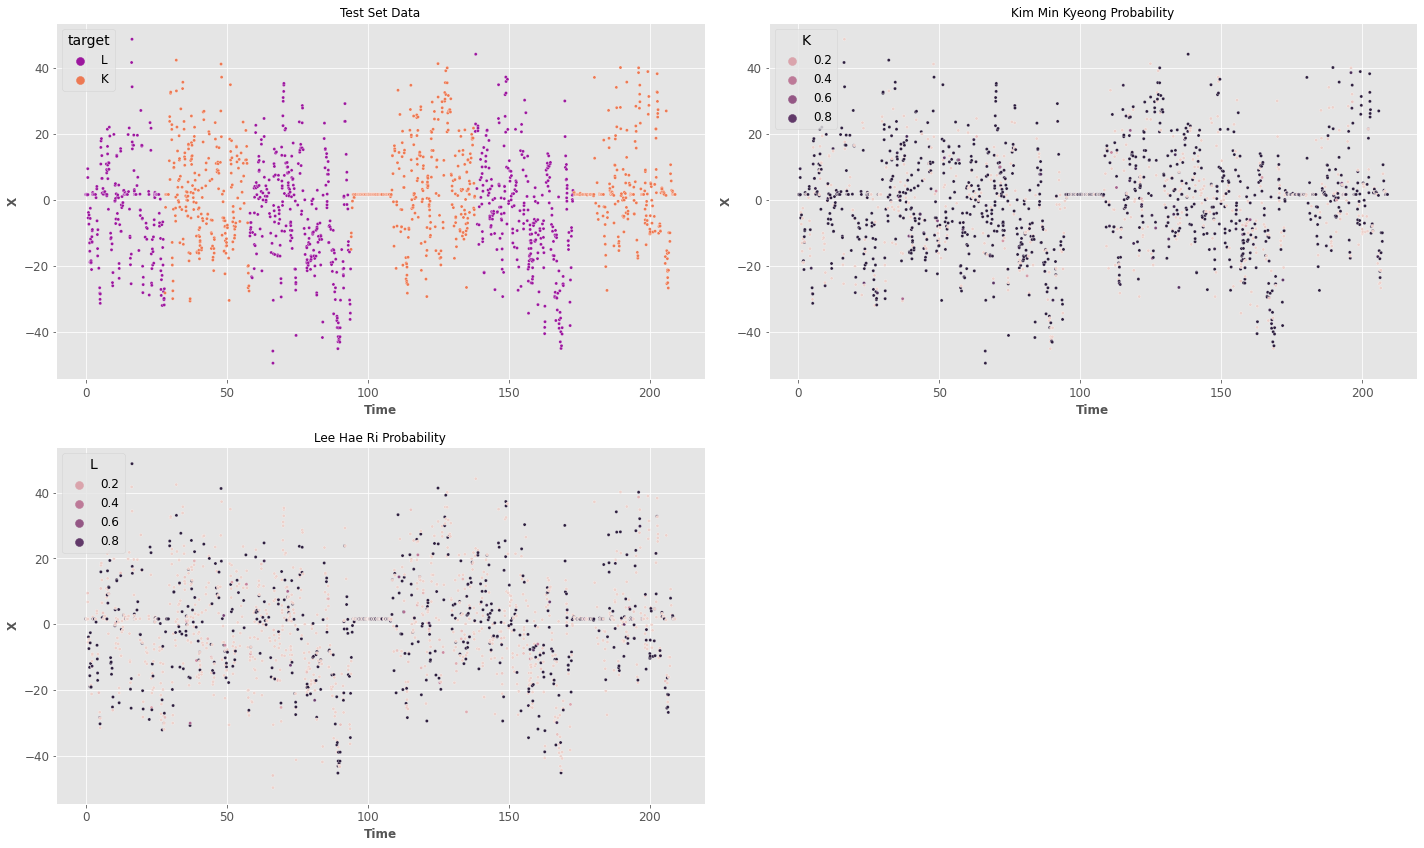

In [728]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.title('Test Set Data')
sns.scatterplot(test_data.Time,test_data.X,s=10,hue=test_data.target,palette='plasma')
plt.grid(True)
plt.subplot(2,2,2)
plt.title('Kim Min Kyeong Probability')
sns.scatterplot(test_data.Time,test_data.X,s=10,hue=test_data['K'])
plt.grid(True)
plt.subplot(2,2,3)
plt.title('Lee Hae Ri Probability')
sns.scatterplot(test_data.Time,test_data.X,s=10,hue=test_data['L'])
plt.grid(True)
# plt.subplot(2,2,4)
# plt.title('Duet Probability')
# sns.scatterplot(test_data.Time,test_data.X,s=10,hue=test_data['D'])
# plt.grid(True)
plt.tight_layout()